# **New York TLC project**
**Part 1 - Explanatory Data Analysis**

In this activity, you will examine data provided and prepare it for analysis. You will also design a professional data visualization that tells a story, and will help data-driven decisions for business needs. 

**The purpose** of this project is to conduct exploratory data analysis on a provided data set. Your mission is to perform further EDA on this data with the aim of learning more about the variables. 
  
**The goal** is to clean data set and create a visualization.
<br/>  
*This activity has 4 parts:*

**Part 1:** Imports, links, and loading

**Part 2:** Data Exploration (Data cleaning)

**Part 3:** Building visualizations

**Part 4:** Evaluate and share results
 

1. Identify any outliers:
* Use a boxplot to visualize the distribution of the data
* Use histograms to visualize the distribution of the data
    
2. How do you make the decision to keep or exclude outliers from any future models?
* There are three main options for dealing with outliers: keeping them as they are, deleting them, or reassigning them. Whether you keep outliers as they are, delete them, or reassign values is a decision that you make taking into account the nature of the outlying data and the assumptions of the model you are building. To help you make the decision, you can start with these general guidelines:

  * Delete them: If you are sure the outliers are mistakes, typos, or errors and the dataset will be used for modeling or machine learning, then you are more likely to decide to delete outliers. Of the three choices, you’ll use this one the least.
  * Reassign them: If the dataset is small and/or the data will be used for modeling or machine learning, you are more likely to choose a path of deriving new values to replace the outlier values.
  * Leave them: For a dataset that you plan to do EDA/analysis on and nothing else, or for a dataset you are preparing for a model that is resistant to outliers, it is most likely that you are going to leave them in.

### Task 1. Imports, links, and loading

For EDA of the data, import the data and packages that would be most helpful, such as pandas, numpy and matplotlib. 

In [11]:
# Import packages and libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

**Note:** As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [12]:
# Load dataset into dataframe
df = pd.read_csv('2017_Yellow_Taxi_Trip_Data.csv')

### Task 2a. Data exploration and cleaning

Decide which columns are applicable

The first step is to assess your data. 

Given our scenario, which data columns are most applicable? 
Which data columns can I eliminate, knowing they won’t solve our problem scenario? 

Consider functions that help you understand and structure the data. 

*    head()
*    describe()
*    info()
*    groupby()
*    sortby()

What do the distributions of your variables tell you about the question you're asking or the problem you're trying to solve?

In [13]:
df.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80


In [14]:
df.shape

(22699, 18)

Use describe... 

In [15]:
df.describe()

,Unnamed: 0,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,2.269900e+04,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
mean,5.675849e+07,1.556236,1.642319,2.913313,1.043394,162.412353,161.527997,1.336887,13.026629,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502
std,3.274493e+07,0.496838,1.285231,3.653171,0.708391,66.633373,70.139691,0.496211,13.243791,0.463097,0.039465,2.800626,1.399212,0.015673,16.097295
min,1.212700e+04,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-120.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000
25%,2.852056e+07,1.000000,1.000000,0.990000,1.000000,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000
50%,5.673150e+07,2.000000,1.000000,1.610000,1.000000,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000
75%,8.537452e+07,2.000000,2.000000,3.060000,1.000000,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000
max,1.134863e+08,2.000000,6.000000,33.960000,99.000000,265.000000,265.000000,4.000000,999.990000,4.500000,0.500000,200.000000,19.100000,0.300000,1200.290000


And info. 

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  object 
 3   tpep_dropoff_datetime  22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   RatecodeID             22699 non-null  int64  
 7   store_and_fwd_flag     22699 non-null  object 
 8   PULocationID           22699 non-null  int64  
 9   DOLocationID           22699 non-null  int64  
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-null  float64
 12  extra                  22699 non-null  float64
 13  mta_tax                22699 non-null  float64
 14  tip_amount             22699 non-null  float64
 15  to

### Task 2b. Select visualization type(s)

Now that you know which data columns you’ll use, it is time to decide which data visualization makes the most sense for EDA of the TLC dataset. What type of data visualization(s) would be most helpful? 

* Line graph
* Bar chart
* Box plot
* Histogram
* Heat map
* Scatter plot
* A geographic map

As you'll see below, a bar chart, box plot and scatter plot will be most helpful in your understanding of this data. 

*A box plot will be helpful to determine outliers and where the bulk of the data points reside in terms of `trip_distance`, `duration`, and `total_amount`*

*A scatter plot will be helpful to visualize the trends and patters and outliers of critical variables, such as `trip_distance` and `total_amount`*

*A bar chart will help determine average number of trips per month, weekday, weekend, etc.*

### Task 3. Data visualization

You’ve assessed your data, and decided on which data variables are most applicable. It’s time to plot your visualization(s)!


### Boxplots

Perform a check for outliers on relevant columns such as trip distance and trip duration. Remember, some of the best ways to identify the presence of outliers in data are box plots and histograms. 

**Note:** Remember to convert your date columns to datetime in order to derive total trip duration.  

In [19]:
# Convert data columns to datetime
df["tpep_pickup_datetime"] = pd.to_datetime(df["tpep_pickup_datetime"])
df["tpep_dropoff_datetime"] = pd.to_datetime(df["tpep_dropoff_datetime"])
df.dtypes

Unnamed: 0                        int64
VendorID                          int64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                   int64
trip_distance                   float64
RatecodeID                        int64
store_and_fwd_flag               object
PULocationID                      int64
DOLocationID                      int64
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
dtype: object

**trip distance**

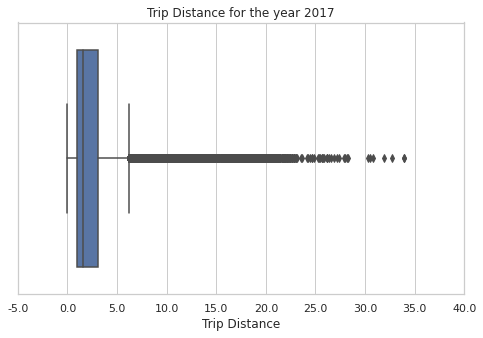

In [21]:
# Create box plot of trip_distance

# Define readable_numbers function
def readable_numbers(x):
    return f"{x:,.1f}"  # Format with commas and 1 decimal

sns.set(style="whitegrid")  # Set seaborn style

plt.figure(figsize=(8, 5))  # Set figure size
box = sns.boxplot(x=df['trip_distance'])  # Create boxplot

g = plt.gca()  # Get current axes
plt.xticks(g.get_xticks(), [readable_numbers(x) for x in g.get_xticks()])  # Format x-ticks
plt.xlabel('Trip Distance')
plt.title('Trip Distance for the year 2017')

plt.show()  # Display plot

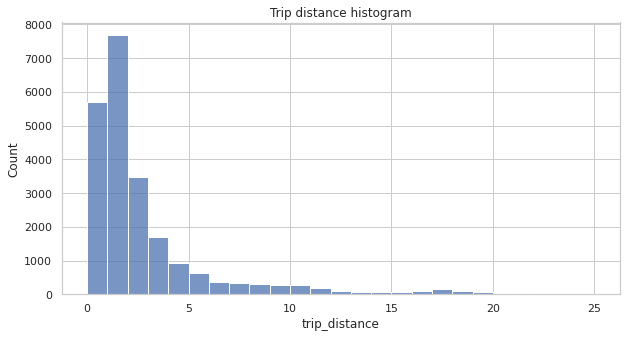

In [31]:
# Create histogram of trip_distance
plt.figure(figsize=(10,5))
sns.histplot(df['trip_distance'], bins=range(0,26,1))
plt.title('Trip distance histogram');

**total amount**

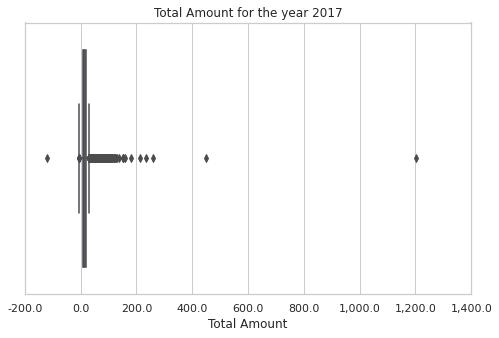

In [25]:
# Create box plot of total_amount

# Define readable_numbers function
def readable_numbers(x):
    return f"{x:,.1f}"  # Format with commas and 1 decimal

sns.set(style="whitegrid")  # Set seaborn style

plt.figure(figsize=(8, 5))  # Set figure size
box = sns.boxplot(x=df['total_amount'])  # Create boxplot

g = plt.gca()  # Get current axes
plt.xticks(g.get_xticks(), [readable_numbers(x) for x in g.get_xticks()])  # Format x-ticks

plt.xlabel('Total Amount')
plt.title('Total Amount for the year 2017')

plt.show()  # Display plot

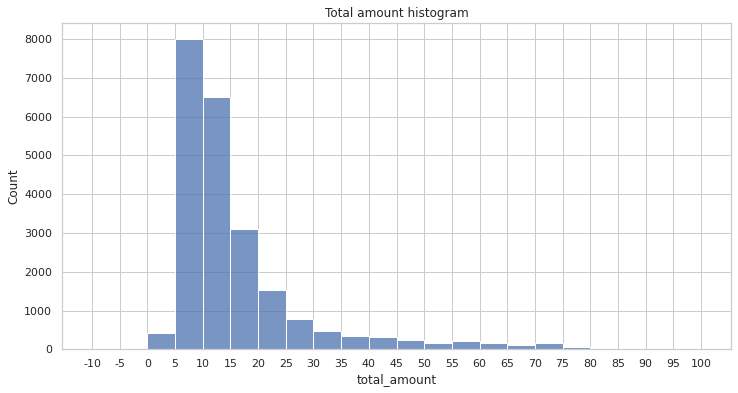

In [32]:
# Create histogram of total_amount
plt.figure(figsize=(12,6))
ax = sns.histplot(df['total_amount'], bins=range(-10,101,5))
ax.set_xticks(range(-10,101,5))
ax.set_xticklabels(range(-10,101,5))
plt.title('Total amount histogram');

**tip amount**

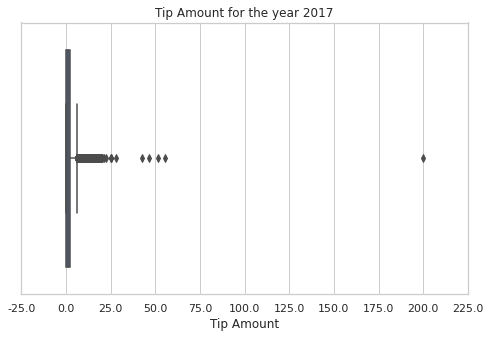

In [27]:
# Create box plot of tip_amount

# Define readable_numbers function
def readable_numbers(x):
    return f"{x:,.1f}"  # Format with commas and 1 decimal

sns.set(style="whitegrid")  # Set seaborn style

plt.figure(figsize=(8, 5))  # Set figure size
box = sns.boxplot(x=df['tip_amount'])  # Create boxplot

g = plt.gca()  # Get current axes
plt.xticks(g.get_xticks(), [readable_numbers(x) for x in g.get_xticks()])  # Format x-ticks

plt.xlabel('Tip Amount')
plt.title('Tip Amount for the year 2017')

plt.show()  # Display plot

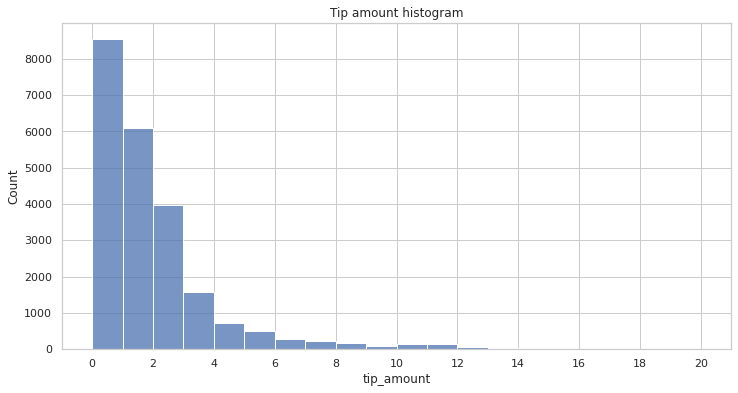

In [33]:
# Create histogram of tip_amount
plt.figure(figsize=(12,6))
ax = sns.histplot(df['tip_amount'], bins=range(0,21,1))
ax.set_xticks(range(0,21,2))
ax.set_xticklabels(range(0,21,2))
plt.title('Tip amount histogram');

**tip_amount by vendor**

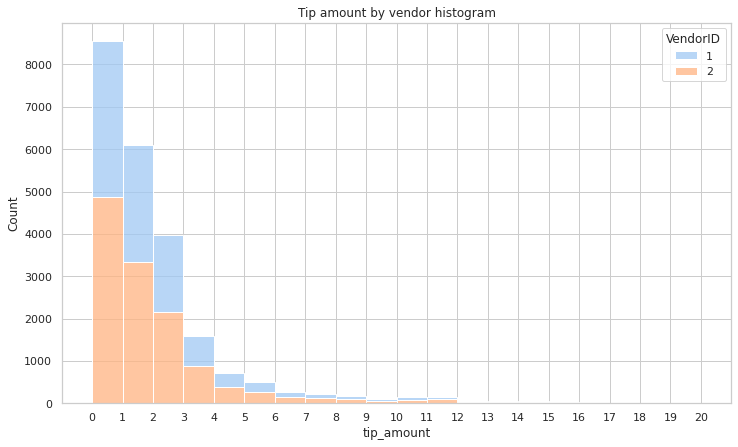

In [34]:
# Create histogram of tip_amount by vendor
plt.figure(figsize=(12,7))
ax = sns.histplot(data=df, x='tip_amount', bins=range(0,21,1), 
                  hue='VendorID', 
                  multiple='stack',
                  palette='pastel')
ax.set_xticks(range(0,21,1))
ax.set_xticklabels(range(0,21,1))
plt.title('Tip amount by vendor histogram');

Next, zoom in on the upper end of the range of tips to check whether vendor one gets noticeably more of the most generous tips.

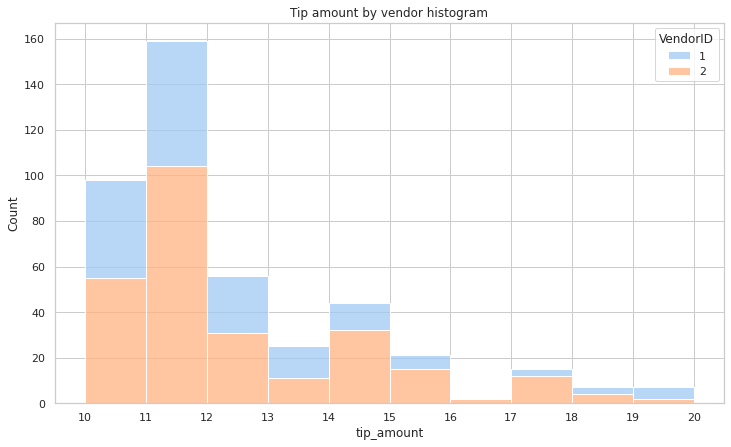

In [35]:
# Create histogram of tip_amount by vendor for tips > $10 
tips_over_ten = df[df['tip_amount'] > 10]
plt.figure(figsize=(12,7))
ax = sns.histplot(data=tips_over_ten, x='tip_amount', bins=range(10,21,1), 
                  hue='VendorID', 
                  multiple='stack',
                  palette='pastel')
ax.set_xticks(range(10,21,1))
ax.set_xticklabels(range(10,21,1))
plt.title('Tip amount by vendor histogram');

**Mean tips by passenger count**

Examine the unique values in the `passenger_count` column.

In [36]:
df['passenger_count'].value_counts()

1    16117
2     3305
5     1143
3      953
6      693
4      455
0       33
Name: passenger_count, dtype: int64

In [37]:
# Calculate mean tips by passenger_count
mean_tips_by_passenger_count = df.groupby(['passenger_count']).mean()[['tip_amount']]
mean_tips_by_passenger_count

,tip_amount
passenger_count,
0,2.135758
1,1.848920
2,1.856378
3,1.716768
4,1.530264
5,1.873185
6,1.720260


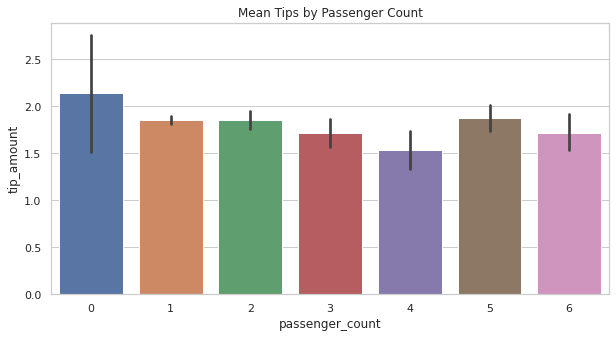

In [39]:
# Create bar plot for mean tips by passenger count
plt.figure(figsize=(10, 5))
sns.barplot(x='passenger_count', y='tip_amount', data=df)
plt.title("Mean Tips by Passenger Count")
# Show the plot.
plt.show()

**Create month and day columns**

In [41]:
# Create a month column
df['month'] = df['tpep_pickup_datetime'].dt.month_name()
# Create a day column
df['day'] = df['tpep_pickup_datetime'].dt.day_name()
df.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,month,day
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,March,Saturday
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,April,Tuesday
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,December,Friday
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69,May,Sunday
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80,April,Saturday


**Plot total ride count by month**

Begin by calculating total ride count by month.

In [42]:
# Get total number of rides for each month
monthly_rides = df['month'].value_counts()
monthly_rides

March        2049
October      2027
April        2019
May          2013
January      1997
June         1964
December     1863
November     1843
February     1769
September    1734
August       1724
July         1697
Name: month, dtype: int64

Reorder the results to put the months in calendar order.

In [43]:
# Reorder the monthly ride list so months go in order
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
         'August', 'September', 'October', 'November', 'December']

monthly_rides = monthly_rides.reindex(index=month_order)
monthly_rides

January      1997
February     1769
March        2049
April        2019
May          2013
June         1964
July         1697
August       1724
September    1734
October      2027
November     1843
December     1863
Name: month, dtype: int64

In [44]:
# Show the index
monthly_rides.index

Index(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December'],
      dtype='object')

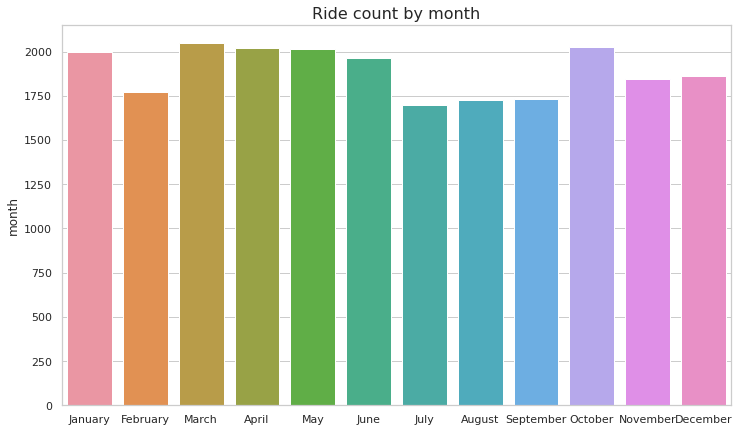

In [45]:
# Create a bar plot of total rides per month
plt.figure(figsize=(12,7))
ax = sns.barplot(x=monthly_rides.index, y=monthly_rides)
ax.set_xticklabels(month_order)
plt.title('Ride count by month', fontsize=16);

**Plot total ride count by day**

Repeat the above process, but now calculate the total rides by day of the week.

In [46]:
# Repeat the above process, this time for rides by day
daily_rides = df['day'].value_counts()

day_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

daily_rides = daily_rides.reindex(index=day_order)

daily_rides

Sunday       2998
Monday       2931
Tuesday      3198
Wednesday    3390
Thursday     3402
Friday       3413
Saturday     3367
Name: day, dtype: int64

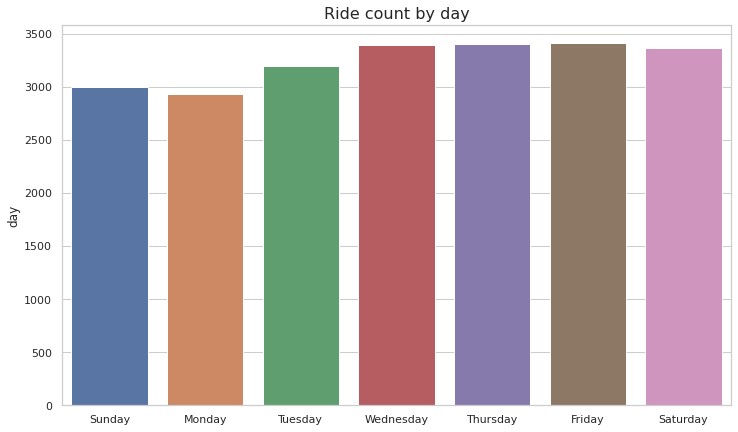

In [47]:
# Create bar plot for ride count by day
plt.figure(figsize=(12,7))
ax = sns.barplot(x=daily_rides.index, y=daily_rides)
ax.set_xticklabels(day_order)
plt.title('Ride count by day', fontsize=16);

**Plot total revenue by day of the week**

Repeat the above process, but now calculate the total revenue by day of the week.

In [52]:
# Repeat the process, this time for total revenue by day
daily_revenue = df.groupby("day")[["total_amount"]].sum()
print(daily_revenue)

           total_amount
day                    
Friday         55818.74
Monday         49574.37
Saturday       51195.40
Sunday         48624.06
Thursday       57181.91
Tuesday        52527.14
Wednesday      55310.47


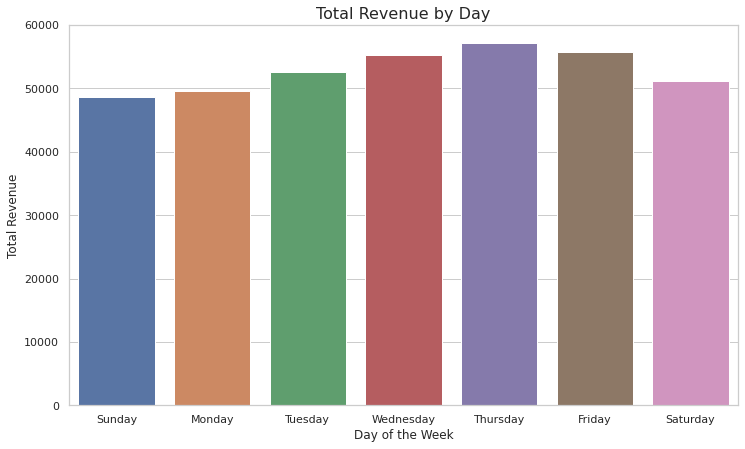

In [56]:
# Create bar plot of total revenue by day

# Reindex to match day order
daily_revenue = daily_revenue.reindex(index=day_order)

# Convert daily_revenue to 1D Series
daily_revenue_series = daily_revenue["total_amount"]  # OR use .squeeze()

# Plot
plt.figure(figsize=(12, 7))
ax = sns.barplot(x=daily_revenue_series.index, y=daily_revenue_series.values)  # ✅ FIX APPLIED
ax.set_xticklabels(day_order)
plt.title("Total Revenue by Day", fontsize=16)
plt.xlabel("Day of the Week")
plt.ylabel("Total Revenue")

plt.show()

**Plot total revenue by month**

In [57]:
# Repeat the process, this time for total revenue by month
monthly_revenue = df.groupby("month")[["total_amount"]].sum()
print(monthly_revenue)

           total_amount
month                  
April          32012.54
August         27759.56
December       31261.57
February       28937.89
January        31735.25
July           26617.64
June           32920.52
March          33085.89
May            33828.58
November       30800.44
October        33065.83
September      28206.38


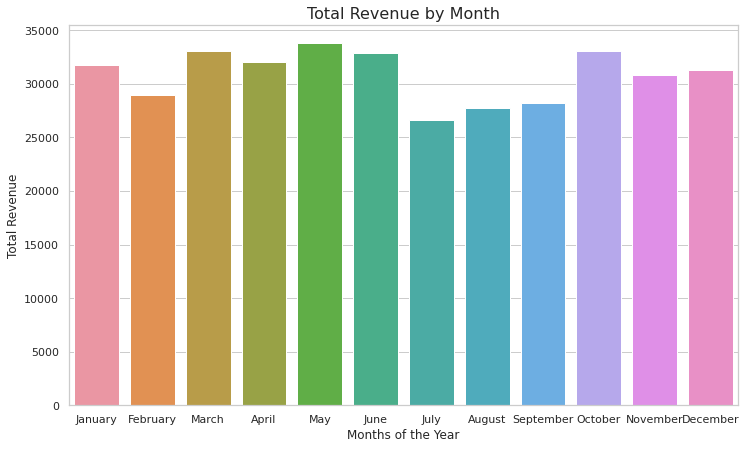

In [59]:
# Create a bar plot of total revenue by month

# Reindex to match day order
monthly_revenue = monthly_revenue.reindex(index=month_order)

# Convert daily_revenue to 1D Series
monthly_revenue_series = monthly_revenue["total_amount"]  # OR use .squeeze()

# Plot
plt.figure(figsize=(12, 7))
ax = sns.barplot(x=monthly_revenue_series.index, y=monthly_revenue_series.values)  # ✅ FIX APPLIED
ax.set_xticklabels(month_order)
plt.title("Total Revenue by Month", fontsize=16)
plt.xlabel("Months of the Year")
plt.ylabel("Total Revenue")

plt.show()

**Plot mean trip distance by drop-off location**

In [60]:
# Get number of unique drop-off location IDs
df['DOLocationID'].nunique()

216

In [61]:
# Calculate the mean trip distance for each drop-off location
distance_by_dropoff = df.groupby('DOLocationID').mean()[['trip_distance']]

# Sort the results in descending order by mean trip distance
distance_by_dropoff = distance_by_dropoff.sort_values(by='trip_distance')
distance_by_dropoff

,trip_distance
DOLocationID,
207,1.200000
193,1.390556
237,1.555494
234,1.727806
137,1.818852
...,...
51,17.310000
11,17.945000
210,20.500000


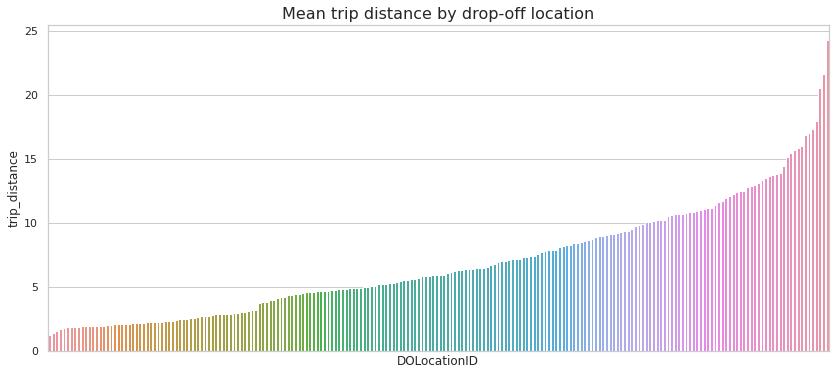

In [62]:
# Create a bar plot of mean trip distances by drop-off location in ascending order by distance
plt.figure(figsize=(14,6))
ax = sns.barplot(x=distance_by_dropoff.index, 
                 y=distance_by_dropoff['trip_distance'],
                 order=distance_by_dropoff.index)
ax.set_xticklabels([])
ax.set_xticks([])
plt.title('Mean trip distance by drop-off location', fontsize=16);

You’ve now completed professional data visualizations according to a business need. Well done! 